## K-Means(2차원)
- K=3, Data=Random(x,y),Cluster=Random(x,y)=mu k={1,2,3}

In [24]:
# K-Means
# K = 3, Data = (x, y), Cluster = Random(x, y) = mu, k={1,2,3}
from random import randrange


K = 3
N = 100

data = list()
cluster = list()

for i in range(N):
    data.append((randrange(0,100), randrange(0,100))) # x좌표(randrange(0, 100)))와 y좌표에 대해 append
    
for i in range(K):
    cluster.append((randrange(0,100), randrange(0,100)))

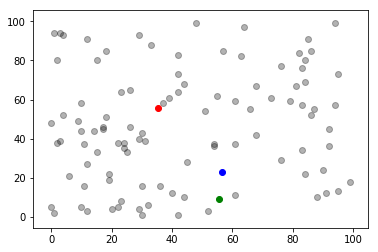

In [51]:
# 2차원에서 그림 그려보기
import matplotlib.pyplot as plt

# 1=r, 2=g, 3=b, D=k

colorMap = ('r','g','b','k') # 색깔지정을 위한 컬러맵 정의

for i in range(N):
    plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colorMap[-1]) # i라는 데이터의 x좌표와 y좌표를 뿌려줌, color는 colorMap[-1](검정색)
    
for i in range(K):
    plt.scatter(cluster[i][0], cluster[i][1], color=colorMap[i])
    
plt.show()

In [26]:
from math import sqrt

#     x1:(x,y)
#     x2:(x,y)

def distance(x1,x2):
    return sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

In [27]:
# point=1 , cluster=K
def expectation(point, cluster):
    distList = list()
    
    for i in range(len(cluster)):
        distList.append(distance(point, cluster[i]))
        
    # 0:10, 1:9, 2:!4    
    return distList.index(min(distList))

In [28]:
def maximiztion(data):
    M = len(data)
    sumX = 0
    sumY = 0
    
    for i in range(len(data)):
        sumX += data[i][0]
        sumY += data[i][1]
        
    return (sumX/M, sumY/M)

In [39]:
from random import sample
cluster = sample(data, K)

rnk = list(list(0 for _ in range(K)) for _ in range(N))

# Expectation
for i in range(N):
    c = expectation(data[i], cluster)
    rnk[i][c] = 1
    
# Maximization
for c in range(K):
    subData = [data[i] for i in range(N) if rnk[i][c]]
    cluster[c] = maximiztion(subData)

In [40]:
rnk

[[1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0,

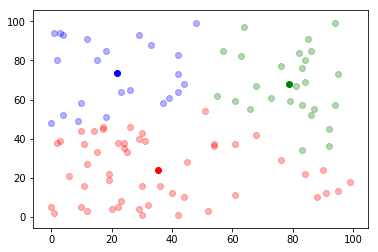

In [41]:
for i in range(N):
    color = rnk[i].index(max(rnk[i]))
    plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colorMap[color])
    
for i in range(K):
    plt.scatter(cluster[i][0], cluster[i][1], color=colorMap[i])
    
plt.show()

In [56]:
def SSE(data, centroid): # 각 센터로이드와 데이터 포인트들간의 거리 반환
    sse = 0.0
    for point in data:
        sse += distance(point, centroid)
    return sse # 모든 데이터 포인트와 centroid간의 거리를 더한 값

In [43]:
sseList = list()

for _ in range(10):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))
    
    for i in range(N):
        c = expectation(data[i], cluster)
        rnk[i][c] = 1
        
    sse = 0.0

    for c in range(K):
        subData = [data[i] for i in range(N) if rnk[i][c]]
        sse += SSE(subData, cluster[c])
        cluster[c] = maximiztion(subData)
            
    print(sse)
    sseList.append(sse)

2376.2591641446916
2263.9882380956265
2242.818890187606
2240.02686511957
2239.8971134824433
2239.8971134824433
2239.8971134824433
2239.8971134824433
2239.8971134824433
2239.8971134824433


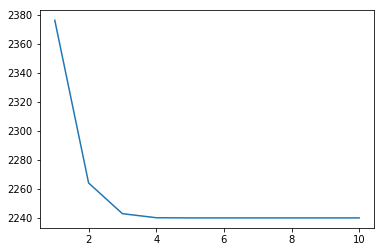

In [44]:
plt.plot(range(1,11), sseList)
plt.show()

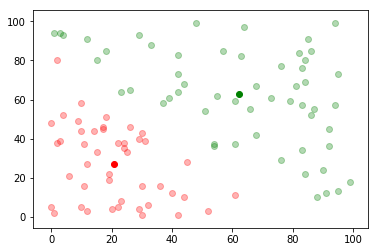

2825.1065339949473


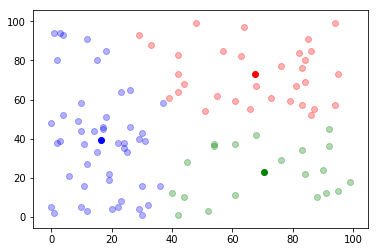

2365.6910592111267


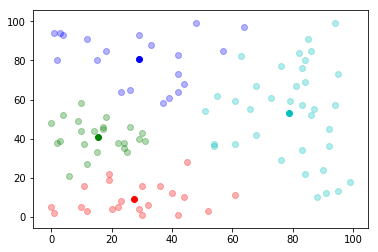

1893.8494419680965


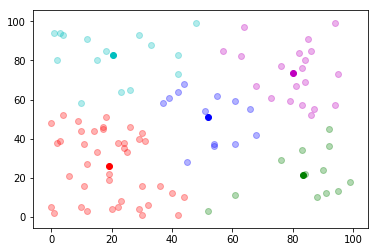

1750.869088403197


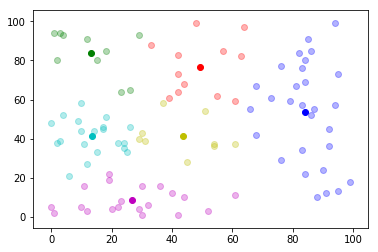

1643.9210009573806


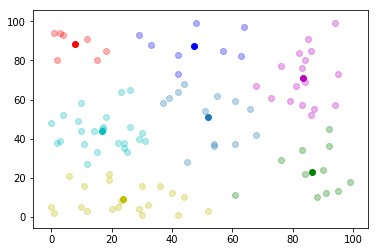

1312.5982271027035


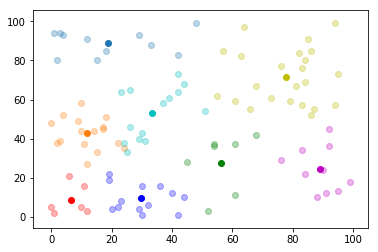

1332.0692204111483


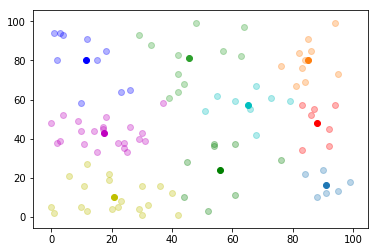

1237.2498022639109


In [45]:
sseList = list()
colorMap = ('r','g','b','c','m','y','C0','C1','C2','C3','C4','C5','k')

for k in range(2, 10):
    cluster = sample(data, k)
    
    for _ in range(10):
        rnk = list(list(0 for _ in range(k)) for _ in range(N))

        for i in range(N):
            c = expectation(data[i], cluster)
            rnk[i][c] = 1

        sse = 0.0

        for c in range(k):
            subData = [data[i] for i in range(N) if rnk[i][c]]
            sse += SSE(subData, cluster[c])
            cluster[c] = maximiztion(subData)
            
    for i in range(N):
        color = rnk[i].index(max(rnk[i]))
        plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colorMap[color])
    
    for i in range(k):
        plt.scatter(cluster[i][0], cluster[i][1], color=colorMap[i])

    plt.show()

    print(sse)
    sseList.append(sse)

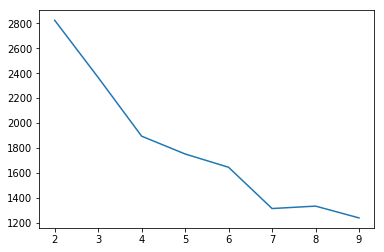

In [46]:
plt.plot(range(2,10), sseList)
plt.show()

In [47]:
from math import log

# x1 내적 x2 /  x1길이 * x2 길이

def cosine(x1,x2):
    innerProduct = x1[0]*x2[0] + x1[1]*x2[1]
    return innerProduct/(distance(x1, (0,0)) * distance(x2, (0,0)))

In [48]:
def expectation(point, cluster):
    distList = list()
    
    for i in range(len(cluster)):
        distList.append(cosine(point, cluster[i]))
        
    return distList.index(max(distList))

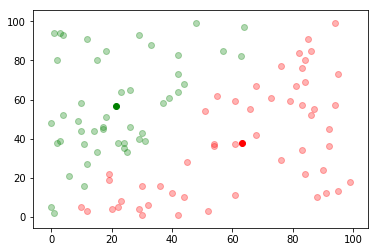

3166.5342613687135


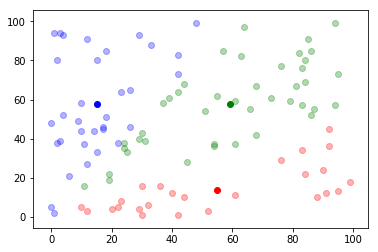

2827.4883092446757


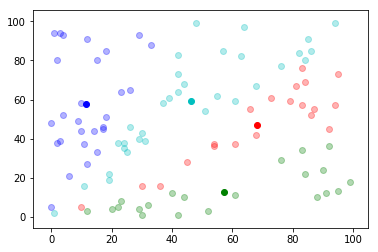

2759.5732521494165


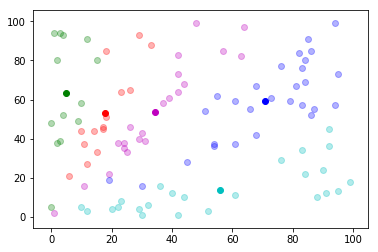

2533.054158404712


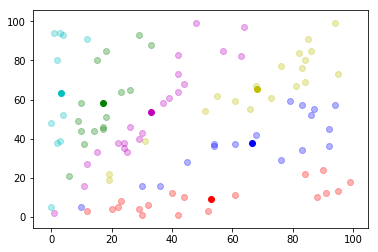

2505.2210942213364


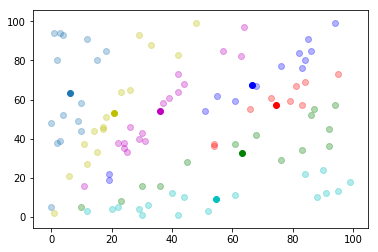

2479.23068483613


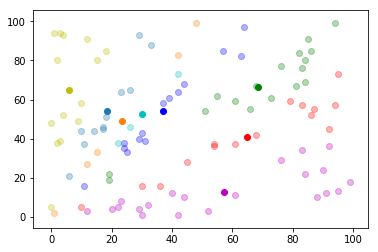

2516.5077830843943


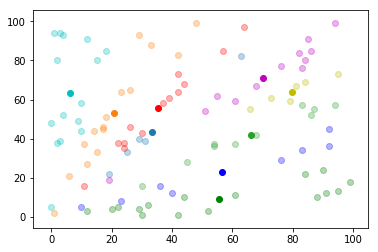

2367.7389963131236


In [49]:
sseList = list()
colorMap = ('r','g','b','c','m','y','C0','C1','C2','C3','C4','C5','k')

for k in range(2, 10):
    cluster = sample(data, k)
    
    for _ in range(10):
        rnk = list(list(0 for _ in range(k)) for _ in range(N))

        for i in range(N):
            c = expectation(data[i], cluster)
            rnk[i][c] = 1

        sse = 0.0

        for c in range(k):
            subData = [data[i] for i in range(N) if rnk[i][c]]
            sse += SSE(subData, cluster[c])
            cluster[c] = maximiztion(subData)
            
    for i in range(N):
        color = rnk[i].index(max(rnk[i]))
        plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colorMap[color])
    
    for i in range(k):
        plt.scatter(cluster[i][0], cluster[i][1], color=colorMap[i])

    plt.show()

    print(sse)
    sseList.append(sse)

## K-Means(다차원)

In [53]:
from math import sqrt
 
# 다차원 공간에서 두 벡터 사이의 유클리디안 구하기
def distance(x1, x2): # x1:(x, y), x2:(x, y)
    _sum = 0.0
    
    for i in range(len(x1)):
        _sum += (x1[i]-x2[i])**2
    return sqrt(_sum)

In [54]:
from math import log
# x1 내적 x2 / x2길이 * x2길이

def cosine(x1, x2): # 다차원 공간에서 두 벡터 사이의 내적 구하기
    _sum = 0.0
    x1Length = 0.0
    x2Length = 0.0
    
    for i in range(len(x1)):
        _sum += x1[i]*x2[i]
        x1Length += x1[i]**2
        x2Length += x2[i]**2
    
    return _sum / (sqrt(x1Length)*sqrt(x2Length)) 

In [55]:
# point = 1개, cluster = K개 
def expectation(point, cluster, cos = False): # 하나의 데이터와 cluster 여러개, cosine함수를 쓸지말지 여부를 받아 expectation반환. 
    distList = list()
    metric = cosine if cos else distance # cos가 true이면 cosine함수포인터를 넘겨줌
    returnValue = max if cos else min
    
    for i in range(len(cluster)):
#         distList.append(distance(point, cluster[i]))
        distList.append(metric(point, cluster[i]))
        
#     return distList.index(min(distList)) # 거리가 최소가 되는 요소의 인덱스를 반환
    return distList.index(returnValue(distList))# 코싸인값이 최대가 되어야 함. 

In [59]:
def maximization(data):
    M = len(data) # 데이터의 개수. M을 분모로 둔다. 
    _vector = list(0.0 for _ in range(len(data[0]))) # 평균만큼 축을 만들어 주어야 한다. 
    
    #모든 데이터에 대해서 
    for i in range(len(data)):
        for j in range(len(data[i])):
            _vector[j] += data[i][j] # 모든 데이터마다 덧셈 수행        
        return [_/M for _ in _vector] # 모든 벡터로부터 하나씩 뽑아서 평균낸 후 리스트로 반환

### cos = False인경우(유클리디안 거리로 클러스터링)
데이터가 원형에 가깝게 클러스터링되는것을 확인 가능

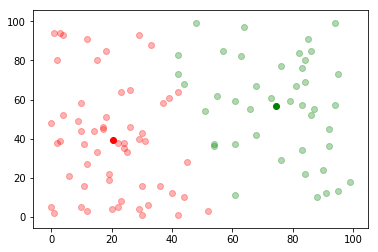

2720.117809779319


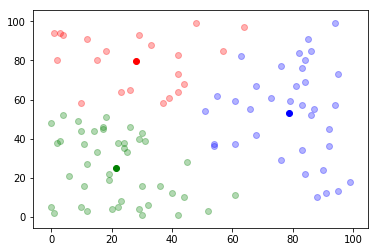

2228.5548927796203


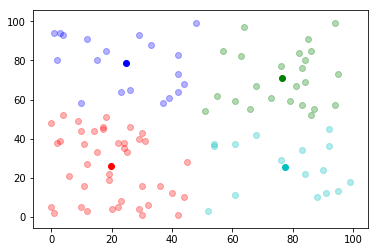

1909.6150115852479


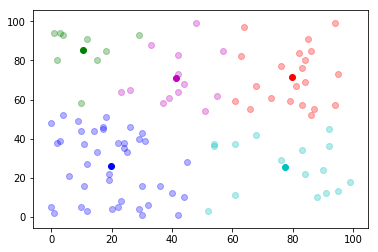

1745.4575445720304


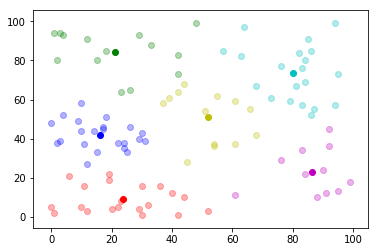

1420.4854783123812


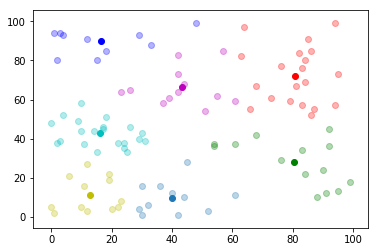

1319.1703505785906


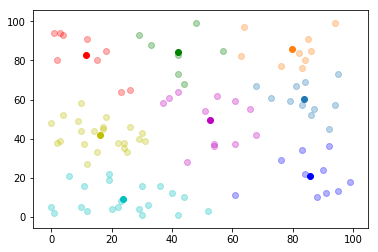

1237.002128921422


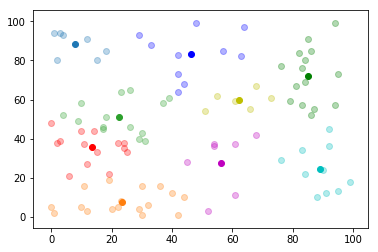

1211.6295365636224


In [62]:
# 찾아야 하는 parameter = 2개(rnk, mu)인데, mu는 k-randomly하게 할당함. 
# rnk = n번째 데이터가 k번째 클러스터에 속했는지를 {0, 1}로 저장. 
sseList = list()
colorMap = ('r','g','b','c','m','y','C0','C1','C2','C3','C4','C5','k')

for k in range(2, 10):
    cluster = sample(data, k)
    
    for _ in range(10):
        rnk = list(list(0 for _ in range(k)) for _ in range(N)) # 리스트인데 0이 K개만큼 있어야하며 이것이 데이터 개수만큼 존재해야 하므로 또 list를 씌움. 
        
        # Expectation구하는 과정
        for i in range(N):
            c = expectation(data[i], cluster)
            rnk[i][c] = 1

        sse = 0.0 # sse : Sum squared error

        # Maximization (특정 클러스터 c에 속하는 데이터의 평균)
        for c in range(k):
            subData = [data[i] for i in range(N) if rnk[i][c]] # rnk[c]는 특정 데이터 행을 가리킴. 이 값이 1이어야만 해당 클러스터에 속하는 데이터이다. 
            sse += SSE(subData, cluster[c])
            cluster[c] = maximiztion(subData) # 기존의 클러스터를 maximization(subData)로 업데이트해줌. 
            
    for i in range(N):
        color = rnk[i].index(max(rnk[i])) # max값은 1이 나올 것이며 이때의 인덱스를 구하고자 함. 
        plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colorMap[color]) # i라는 데이터의 x좌표와 y좌표를 뿌려줌, color는 colorMap[-1](검정색)
    
    for i in range(k):
        plt.scatter(cluster[i][0], cluster[i][1], color=colorMap[i])

    plt.show()

    print(sse)
    sseList.append(sse)

### cos = True인경우
데이터가 1사분면의 원점을 기준으로 우상단을 향해 긴 타원을 그리며 클러스터링되는것을 확인 가능

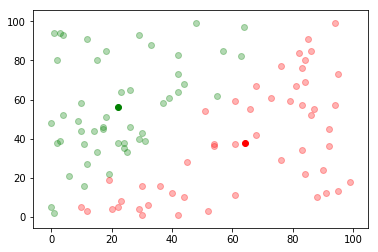

3187.1151007792523


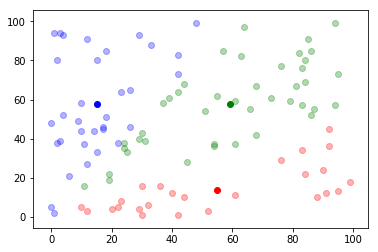

2827.4883092446757


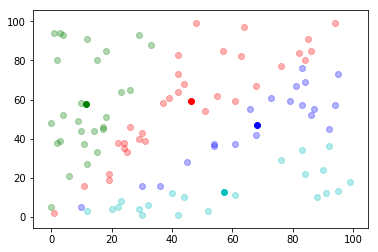

2759.5732521494165


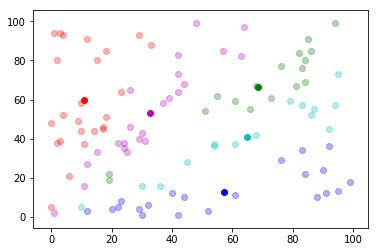

2575.2850172335857


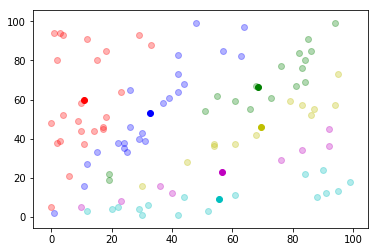

2534.4001793511443


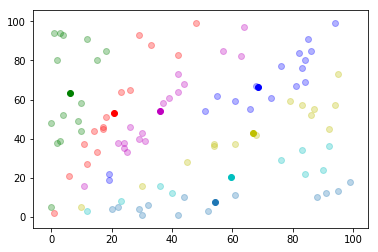

2482.90229909392


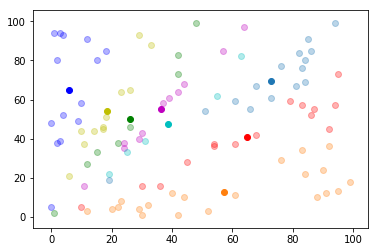

2465.334478329938


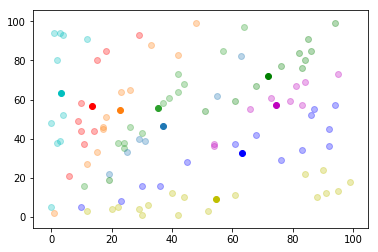

2414.586885731844


In [63]:
sseList = list()
colorMap = ('r','g','b','c','m','y','C0','C1','C2','C3','C4','C5','k')

for k in range(2, 10):
    cluster = sample(data, k)
    
    for _ in range(10):
        rnk = list(list(0 for _ in range(k)) for _ in range(N))

        for i in range(N):
            c = expectation(data[i], cluster, True)
            rnk[i][c] = 1

        sse = 0.0

        for c in range(k):
            subData = [data[i] for i in range(N) if rnk[i][c]]
            sse += SSE(subData, cluster[c])
            cluster[c] = maximiztion(subData)
            
    for i in range(N):
        color = rnk[i].index(max(rnk[i]))
        plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colorMap[color])
    
    for i in range(k):
        plt.scatter(cluster[i][0], cluster[i][1], color=colorMap[i])

    plt.show()

    print(sse)
    sseList.append(sse)

In [64]:
documents = [
    "This little kitty came to play when I was eating at a restaurant.",
    "Merley has the best squooshy kitten belly.", 
    "Google Translate app is incredible.",
    "If you open 100 tab in google you get a smiley face.",
    "Best cat photo I've ever taken.", 
    "Climbing ninja cat.", 
    "Impressed with google map feedback.",
    "Key promoter extension for google chrome." 
]

In [66]:
import nltk
nltk.download('stopwords') # 1회만 실행할것

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MGL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [67]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import defaultdict # 구조 만들기 목적
from math import log10
import re

# DTM 만들기. DTM = document-term-freq....구조. 
DTM = defaultdict(lambda: defaultdict(int)) # 빈도를 적을 것이므로 int
# TDM = 어떤 term이 어떤 document에서 얼만큼의 freq로 나왔는지
TDM = defaultdict(lambda: defaultdict(int))
# TWM = term-document-weight(tf-idf)
TWM = defaultdict(lambda: defaultdict(float))

stopList = stopwords.words("english") # 단어들만 남아있음. 
puncPattern = re.compile(r"[{0}]".format(re.escape(punctuation)))

for i, d in enumerate(documents): # collection
    for t in word_tokenize(d.lower()): # 소문자로 변환한 후 구두점 분리 => 이를 통해 단어를 추출함('t'). 
        if t not in stopList and not puncPattern.match(t): 
            DTM[i][t] += 1 # if문을 통과한 단어만 색인어로 취급. 구두점, at과 같은 쓸데없는 단어를 제거한다. 
            
# i = index     
for i, termList in DTM.items():
    for t, f in termList.items():
        TDM[t][i] = f
        
# V = 전체 단어가 몇개인지
V = len(TDM.keys())
N = len(DTM.keys())

# TWM => TF-IDF 구하기(freq/max)*(logN/df), 여기서 max는 모르는 값.
for t, docList in TDM.items():
    df = len(docList)
    for d, f in docList.items():
        maxtf = max(DTM[d].values())
        TWM[t][d] = (f/maxtf) * log(N/df)

In [68]:
V, N # 총 8개의 문서에서 34개의 단어 추출 완료

(34, 8)

In [69]:
TWM # little은 0번째 문서에서 2.0794415416798357만큼의 가중치를 가짐. 문서 중에서 단 한번만 나왔으므로 옳게 나왔다. 

defaultdict(<function __main__.<lambda>()>,
            {'little': defaultdict(float, {0: 2.0794415416798357}),
             'kitty': defaultdict(float, {0: 2.0794415416798357}),
             'came': defaultdict(float, {0: 2.0794415416798357}),
             'play': defaultdict(float, {0: 2.0794415416798357}),
             'eating': defaultdict(float, {0: 2.0794415416798357}),
             'restaurant': defaultdict(float, {0: 2.0794415416798357}),
             'merley': defaultdict(float, {1: 2.0794415416798357}),
             'best': defaultdict(float,
                         {1: 1.3862943611198906, 4: 1.3862943611198906}),
             'squooshy': defaultdict(float, {1: 2.0794415416798357}),
             'kitten': defaultdict(float, {1: 2.0794415416798357}),
             'belly': defaultdict(float, {1: 2.0794415416798357}),
             'google': defaultdict(float,
                         {2: 0.6931471805599453,
                          3: 0.6931471805599453,
                      